![title](wcar.png)
# Interaction Partners for PIG-C
    Zhe Ji, Michele Tinti and Michael A.J. Ferguson

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee


In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2

In [2]:
#set up code
%run imports.py 

In [3]:
import utilities
pd.set_option('max_colwidth', 12)

In [4]:
#create a description dictionary
#prot_id -> desc
path_to_file = 'TriTrypDB-41_TbruceiTREU927_AnnotatedProteins_plusVSG.fasta'
desc_dict = utilities.make_desc_dict(path_to_file)

In [5]:
TXT_PATH = os.path.join('RUN_1', 'combined', 'txt')

In [6]:
#read data and log transform for plots
df = pd.read_csv(os.path.join(TXT_PATH,'proteinGroups.txt'),sep='\t')
df = utilities.clean_df(df)
df=df.dropna(subset=['Protein IDs'],axis=0)
utilities.mod_df(df, desc_dict) 
df.head()

removed  101 Only identified by site
tot  101  entries removed
---------------
removed  37 Reverse
tot  138  entries removed
---------------
removed  68 Potential contaminant
tot  206  entries removed
---------------


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Gene_id,Gene_desc,Gene_id_all,Gene_desc_all
155,Tb05.5K5...,Tb05.5K5...,97;97;55,97;97;55,97;97;55,Tb05.5K5...,3,97,97,97,...,1137;113...,4060;406...,4086;408...,4086;410...,132;133;...,26;251;2...,Tb05.5K5...,major va...,Tb05.5K5...,major va...
156,Tb927.5....,Tb927.5....,6;6,6;6,6;6,Tb927.5....,2,6,6,6,...,78;9312;...,282;3135...,293;3158...,293;3158...,NaN,NaN,Tb927.5....,hypothet...,Tb927.5....,hypothet...
157,Tb927.5....,Tb927.5....,12;12,12;12,12;12,Tb927.5....,2,12,12,12,...,4603;460...,16339;16...,16455;16...,16456;41...,144;145;...,71;112;1...,Tb927.5....,ras-like...,Tb927.5....,ras-like...
158,Tb927.5....,Tb927.5....,119;119,119;119,119;119,Tb927.5....,2,119,119,119,...,277;896;...,922;923;...,898;899;...,899;3346...,148;149;...,1;61;236...,Tb927.5....,Kinetoch...,Tb927.5....,Kinetoch...
159,Tb927.5....,Tb927.5....,18;18;18,18;18;18,18;18;18,Tb927.5....,3,18,18,18,...,2226;224...,7982;798...,7967;796...,7970;813...,166,190,Tb927.5....,guanine ...,Tb927.5....,guanine ...


In [7]:
tag = 'iBAQ'
bait_cols = [tag+' Bait_'+str(n) for n in range(1,4)]
control_cols = [tag+' Control_'+str(n) for n in range(1,4)]
cols = bait_cols+control_cols
selection = df[cols]
selection.head()

,iBAQ Bait_1,iBAQ Bait_2,iBAQ Bait_3,iBAQ Control_1,iBAQ Control_2,iBAQ Control_3
155,111320.0,3.170400...,22109000.0,94591.0,2.560300...,48395000.0
156,0.0,5.701500...,117090.0,3012.0,2.613900...,0.0
157,2315200.0,2.823200...,1669300.0,17786.0,7.038700...,7821200.0
158,1434.6,3.685800...,38002000.0,2520.4,2.623900...,26151000.0
159,267950.0,1.534700...,2145700.0,213240.0,2.638200...,5017900.0


In [8]:

selection.columns = [n.replace(tag+' ','') for n in selection.columns]
selection.head()

,Bait_1,Bait_2,Bait_3,Control_1,Control_2,Control_3
155,111320.0,3.170400...,22109000.0,94591.0,2.560300...,48395000.0
156,0.0,5.701500...,117090.0,3012.0,2.613900...,0.0
157,2315200.0,2.823200...,1669300.0,17786.0,7.038700...,7821200.0
158,1434.6,3.685800...,38002000.0,2520.4,2.623900...,26151000.0
159,267950.0,1.534700...,2145700.0,213240.0,2.638200...,5017900.0


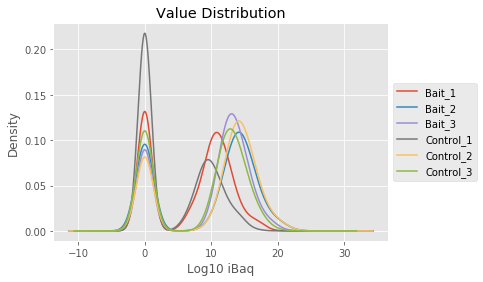

In [9]:
np.log1p(selection).plot(kind='kde')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Value Distribution')
plt.xlabel('Log10 iBaq')
plt.show()

## Impute missing value
Nan and missing values are replaced with zeros. We add to each column a small randon number. The number is selected from a gauss distribution centred at the minimum value of the column with 0.25 std

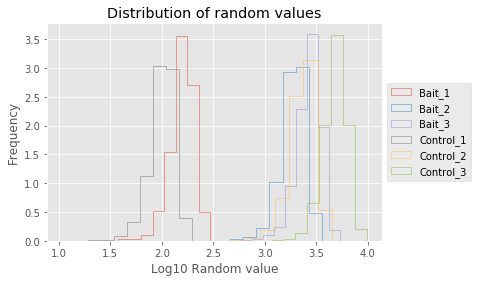

In [10]:
for n in selection.columns:
    selection[n]=utilities.replace_nan(selection[n])  

fig, ax = plt.subplots()
for n in selection.columns:
    selection[n] = utilities.impute(selection[n],ax=ax)

utilities.hist_legend(ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of random values')
plt.xlabel('Log10 Random value')
#plt.xlabel('Log10 Random value')
plt.show()

## Sample Loading Normalization 

In [11]:
normed_df = utilities.norm_loading(selection)
normed_df.head()

,Bait_1,Bait_2,Bait_3,Control_1,Control_2,Control_3
155,1.421880...,1.359927...,3.056735...,2.264800...,1.036886...,1.360242...
156,2.499477...,2.490968...,1.670896...,7.479911...,1.066989...,1.199083...
157,2.952350...,1.211081...,2.310272...,4.280191...,2.850626...,2.199670...
158,2.112119...,1.581017...,5.253736...,6.175047...,1.062651...,7.351403...
159,3.418760...,6.594157...,2.970531...,5.102097...,1.069249...,1.411308...


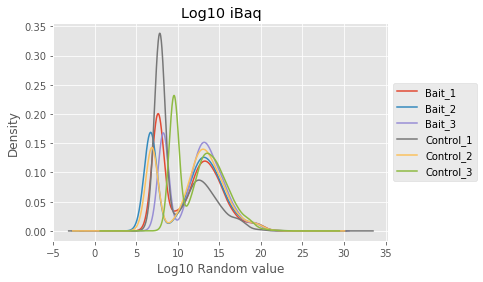

In [12]:
np.log1p(normed_df).plot(kind='kde')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Log10 iBaq')
plt.xlabel('Log10 Random value')

normed_df.columns = ['E1', 'E2', 'E3','C1','C2', 'C3']

## IRS nomalization

In [13]:
#mean of the sum intensity of all the proteins in each channel
irs = pd.concat([normed_df[['E1','C1']].sum(axis=1), 
                 normed_df[['E2','C2']].sum(axis=1),
                normed_df[['E3','C3']].sum(axis=1)], axis=1)
irs.columns = ["sum1", "sum2", "sum3"]
#geometric mean of the sum intensity of all the proteins
irs['average']=np.exp(np.log(irs).mean(axis=1))
#normalization factors for each protein in each dataset
irs['fac1']=irs['average'] / irs['sum1']
irs['fac2']=irs['average'] / irs['sum2']
irs['fac3']=irs['average'] / irs['sum3']

data_irs_1 = normed_df[['E1','C1']].multiply(irs.fac1, axis=0)
data_irs_2 = normed_df[['E2','C2']].multiply(irs.fac2, axis=0)
data_irs_3 = normed_df[['E3','C3']].multiply(irs.fac3, axis=0)
#combine again
data_irs = pd.concat([data_irs_1,data_irs_2,data_irs_3],axis=1)
data_irs.head()

,E1,C1,E2,C2,E3,C3
155,4.387344...,6.988253...,6.454399...,4.921199...,2.087271...,9.288326...
156,3.949228...,1.181842...,2.311632...,9.901713...,1.139557...,8.177786...
157,3.048141...,4.419065...,9.220423...,2.170290...,2.939127...,2.798419...
158,3.575739...,1.045413...,8.390409...,5.639457...,5.847553...,8.182313...
159,2.533047...,3.780274...,2.408277...,3.905044...,1.097772...,5.215549...


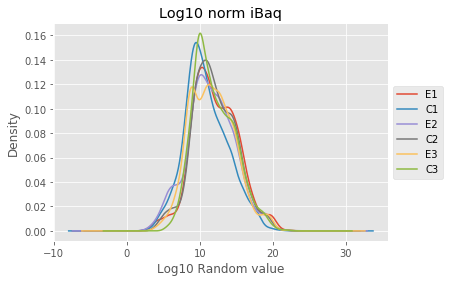

In [14]:
np.log1p(data_irs).plot(kind='kde')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Log10 norm iBaq')
plt.xlabel('Log10 Random value')
plt.show()

In [15]:
#data_irs.describe()

## Dimensionality Reduction

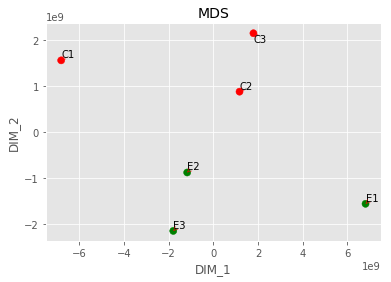

In [16]:
palette=['g','r','g','r','g','r']
fig, ax = plt.subplots()
utilities.make_mds(data_irs, palette, ax, top=500)

## t-Test

In [17]:
data_irs['mean_E']=data_irs[['E1','E2','E3']].mean(axis=1)
data_irs['mean_C']=data_irs[['C1','C2','C3']].mean(axis=1)
data_irs['log10Sum']=np.log10(data_irs[['E1','E2','E3','C1','C2','C3']].sum(axis=1))
data_irs['log2FC']=np.log2(data_irs['mean_E']/data_irs['mean_C'])
data_irs['prot_id'] = [df.loc[n]['Gene_id'] for n in data_irs.index.values]
data_irs['desc']=[desc_dict[n] for n in data_irs.prot_id]
data_irs['desc'] = [n.replace('gene_product=','') for n in data_irs['desc'] ]
data_irs['Log10signal_Q'] = pd.qcut(data_irs['log10Sum'], 50, range(50))
t, prob = ttest_ind(data_irs[['E1','E2','E3']].values,data_irs[['C1','C2','C3']].values,axis=1)
data_irs['t']=t
data_irs['prob']=prob
data_irs['log10pvalue']=-np.log10(data_irs['prob'])

In [18]:
data_irs.head()
#data_irs['index']=data_irs.index.values
#data_irs.set_index('prot_id',inplace=True)

,E1,C1,E2,C2,E3,C3,mean_E,mean_C,log10Sum,log2FC,prot_id,desc,Log10signal_Q,t,prob,log10pvalue
155,4.387344...,6.988253...,6.454399...,4.921199...,2.087271...,9.288326...,4.309671...,7.065926...,8.533095,-0.713301,Tb05.5K5...,major va...,48,-1.545230,0.197181,0.705134
156,3.949228...,1.181842...,2.311632...,9.901713...,1.139557...,8.177786...,4.700707...,7.512638...,5.563956,-0.676442,Tb927.5....,hypothet...,19,-0.586037,0.589324,0.229646
157,3.048141...,4.419065...,9.220423...,2.170290...,2.939127...,2.798419...,1.421365...,1.670967...,7.967407,-0.233405,Tb927.5....,ras-like...,46,-0.211788,0.842626,0.074365
158,3.575739...,1.045413...,8.390409...,5.639457...,5.847553...,8.182313...,5.937900...,8.091965...,7.624175,-0.446537,Tb927.5....,Kinetoch...,45,-1.095314,0.334903,0.475081
159,2.533047...,3.780274...,2.408277...,3.905044...,1.097772...,5.215549...,2.013032...,4.300289...,7.277379,-1.095064,Tb927.5....,guanine ...,42,-3.523260,0.024378,1.612998


In [19]:
%load_ext rpy2.ipython
%matplotlib inline

## Run EdgeR on msms count

In [20]:
tag = 'MS/MS count'
bait_cols = [tag+' Bait_'+str(n) for n in range(1,4)]
control_cols = [tag+' Control_'+str(n) for n in range(1,4)]
cols = bait_cols+control_cols
count_df = df[cols]
count_df.columns = [n.replace(tag+' ','') for n in count_df.columns]
count_df.head()

,Bait_1,Bait_2,Bait_3,Control_1,Control_2,Control_3
155,15,576,49,13,427,78
156,0,1,4,1,3,0
157,16,8,3,5,11,9
158,1,257,93,4,209,93
159,13,3,14,9,7,24


In [21]:
%%R -i count_df
options(warn=-1)
library("tidyverse")
library("psych")
library("gridExtra")
library("scales")
library("limma") 
library("edgeR")

In [22]:
%%R
accession <- count_df$'index'
limma_data = within(count_df, rm('index'))

In [23]:
%%R
group <- c(rep("Bait", 3), rep("Control", 3))
y <- DGEList(counts = limma_data, 
             group = group, genes = accession)


In [24]:
%R y$samples

,group,lib.size,norm.factors
Bait_1,Bait,21145.0,1.0
Bait_2,Bait,34444.0,1.0
Bait_3,Bait,24417.0,1.0
Control_1,Control,12623.0,1.0
Control_2,Control,33912.0,1.0
Control_3,Control,23815.0,1.0


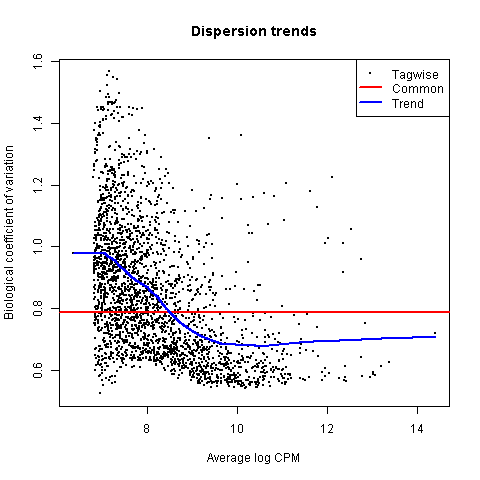

In [25]:
%%R
y <- calcNormFactors(y)
y <- estimateDisp(y)
plotBCV(y, main = "Dispersion trends")

In [26]:
%%R
et <- exactTest(y, pair = c("Bait", "Control"))
tt <- topTags(et, n = Inf, sort.by = "none")$table

In [27]:
%R head(tt)

,logFC,logCPM,PValue,FDR
155,-0.282035,12.752955,0.812829,1.0
156,-0.148806,7.146750,1.000000,1.0
157,-0.030373,8.801039,1.000000,1.0
158,-0.160919,11.972702,0.901682,1.0
159,0.576873,9.198063,0.562645,1.0
160,1.117995,6.749182,0.711675,1.0


In [28]:
%R -o tt

In [29]:
#add back edgeR output
tt['log10_PValue']=-np.log10(tt['PValue'])
tt.columns = ['edgeR_'+n for n in tt.columns]

In [30]:
#the index of R table is formatted as string,
#put back as number
tt['index'] = [int(n) for n in tt.index.values]
tt.set_index('index',inplace=True)

In [31]:
data_irs = data_irs.join(tt)
data_irs.head()

,E1,C1,E2,C2,E3,C3,mean_E,mean_C,log10Sum,log2FC,...,desc,Log10signal_Q,t,prob,log10pvalue,edgeR_logFC,edgeR_logCPM,edgeR_PValue,edgeR_FDR,edgeR_log10_PValue
155,4.387344...,6.988253...,6.454399...,4.921199...,2.087271...,9.288326...,4.309671...,7.065926...,8.533095,-0.713301,...,major va...,48,-1.545230,0.197181,0.705134,-0.282035,12.752955,0.812829,1.0,0.090001
156,3.949228...,1.181842...,2.311632...,9.901713...,1.139557...,8.177786...,4.700707...,7.512638...,5.563956,-0.676442,...,hypothet...,19,-0.586037,0.589324,0.229646,-0.148806,7.146750,1.000000,1.0,-0.000000
157,3.048141...,4.419065...,9.220423...,2.170290...,2.939127...,2.798419...,1.421365...,1.670967...,7.967407,-0.233405,...,ras-like...,46,-0.211788,0.842626,0.074365,-0.030373,8.801039,1.000000,1.0,-0.000000
158,3.575739...,1.045413...,8.390409...,5.639457...,5.847553...,8.182313...,5.937900...,8.091965...,7.624175,-0.446537,...,Kinetoch...,45,-1.095314,0.334903,0.475081,-0.160919,11.972702,0.901682,1.0,0.044947
159,2.533047...,3.780274...,2.408277...,3.905044...,1.097772...,5.215549...,2.013032...,4.300289...,7.277379,-1.095064,...,guanine ...,42,-3.523260,0.024378,1.612998,0.576873,9.198063,0.562645,1.0,0.249765


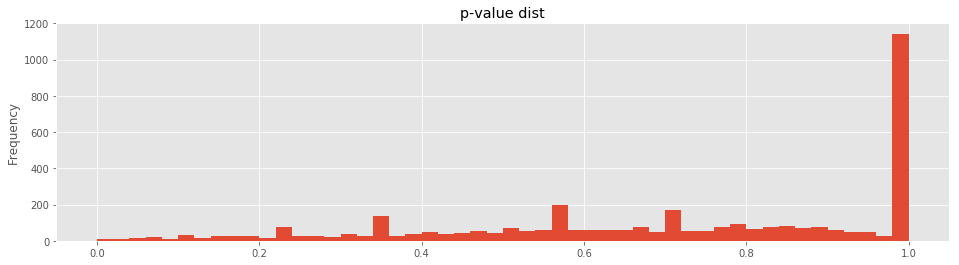

In [32]:
tt['edgeR_PValue'].plot(kind='hist',bins=50,figsize=(16,4))
plt.title('p-value dist')
plt.show()

## Run limma 

In [33]:
r_df = data_irs[['E1','E2','E3','C1','C2','C3']]
r_df['prot_id']=r_df.index.values

In [34]:
%%R -i r_df
options(warn=-1)
library("tidyverse")
library("psych")
library("gridExtra")
library("scales")
library("limma") 
library("edgeR")

In [35]:
%%R
accession <- r_df$'prot_id'
limma_data = within(r_df, rm('prot_id'))

In [36]:
%R head(limma_data)

,E1,E2,E3,C1,C2,C3
155,4.387344...,6.454399...,2.087271...,6.988253...,4.921199...,9.288326...
156,3.949228...,2.311632...,1.139557...,1.181842...,9.901713...,8.177786...
157,3.048141...,9.220423...,2.939127...,4.419065...,2.170290...,2.798419...
158,3.575739...,8.390409...,5.847553...,1.045413...,5.639457...,8.182313...
159,2.533047...,2.408277...,1.097772...,3.780274...,3.905044...,5.215549...
160,3.238339...,7.275156...,1.452594...,1.164347...,7.606656...,1.342922...


In [37]:
%%R
row.names(limma_data) <- accession # add accessions as row names
# set up the design matrix
group <- as.factor(c(rep("bait", 3), rep("control", 3)))
group <- factor(group, levels(group)[c(2, 1)]) # set the factor order
design <- model.matrix(~ 0 + group)
colnames(design) <- c("bait", "control")

# make the contrast
contrast <- makeContrasts(control-bait, levels = design)

B <- 1:3
C <- 4:6
# do the linear model fitting on log2 values
limma_log_data <- log2(limma_data[c(B, C)])
fit <- lmFit(limma_log_data, design)

# get the fit for the contrast of interest
fit2 <- contrasts.fit(fit, contrast)

# do the empirical Bayes moderation of the test statistic (with trended variance)
fit2 <- eBayes(fit2, trend = TRUE)

# grab the information in topTable so we can get the data to plot candidates
# the coef parameter has to do with the contrast of interest
# specify no sorting of results and a number that is longer than the data table
tt_limma <- topTable(fit2, coef = 1, sort.by = "none", number = Inf)

In [38]:
# let's see how many up and down candidates, and the top tags
%R topTable(fit2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
3678,13.189827,17.812068,16.354137,0.000005,0.020003,2.498573
360,16.221194,19.775606,13.209445,0.000018,0.022292,2.092890
3830,-9.497797,15.651770,-12.644054,0.000022,0.022292,1.995234
1615,9.051795,15.870331,12.241875,0.000027,0.022292,1.919762
2653,15.008227,19.526573,11.994087,0.000030,0.022292,1.870554
2354,8.042971,15.337660,10.855406,0.000052,0.032071,1.614152
3174,-8.176128,14.892804,-10.188780,0.000073,0.036227,1.437176
506,15.096331,18.945101,9.859355,0.000087,0.036227,1.341148
1959,9.623008,16.309009,9.664900,0.000097,0.036227,1.281555
989,-7.657736,14.662224,-9.660780,0.000098,0.036227,1.280268


In [39]:
%%R
# statisticl test results
limma_data$limma_Acc <- accession
limma_data$limma_PValue <- tt_limma$P.Value
limma_data$limma_FDR <- tt_limma$adj.P.Val
head(limma_data)
# add a DE candidate status column
limma_data$limma_candidate <- cut(limma_data$limma_FDR, breaks = c(-Inf, 0.01, 0.05, 0.10, 1.0), 
                           labels = c("high", "med", "low", "no"))


In [40]:
%R head(limma_data)

,E1,E2,E3,C1,C2,C3,limma_Acc,limma_PValue,limma_FDR,limma_candidate
155,4.387344...,6.454399...,2.087271...,6.988253...,4.921199...,9.288326...,155,0.173880,0.567426,no
156,3.949228...,2.311632...,1.139557...,1.181842...,9.901713...,8.177786...,156,0.553512,0.753821,no
157,3.048141...,9.220423...,2.939127...,4.419065...,2.170290...,2.798419...,157,0.779904,0.893589,no
158,3.575739...,8.390409...,5.847553...,1.045413...,5.639457...,8.182313...,158,0.356883,0.642493,no
159,2.533047...,2.408277...,1.097772...,3.780274...,3.905044...,5.215549...,159,0.057613,0.533021,no
160,3.238339...,7.275156...,1.452594...,1.164347...,7.606656...,1.342922...,160,0.082052,0.533021,no


In [41]:
# count candidates
print("Candidate Counts:")
%R summary(limma_data$limma_candidate)

Candidate Counts:


array([   0,   10,    1, 3703], dtype=int32)

In [42]:
%R -o limma_data

In [43]:
limma_data.head()

,E1,E2,E3,C1,C2,C3,limma_Acc,limma_PValue,limma_FDR,limma_candidate
155,4.387344...,6.454399...,2.087271...,6.988253...,4.921199...,9.288326...,155,0.173880,0.567426,no
156,3.949228...,2.311632...,1.139557...,1.181842...,9.901713...,8.177786...,156,0.553512,0.753821,no
157,3.048141...,9.220423...,2.939127...,4.419065...,2.170290...,2.798419...,157,0.779904,0.893589,no
158,3.575739...,8.390409...,5.847553...,1.045413...,5.639457...,8.182313...,158,0.356883,0.642493,no
159,2.533047...,2.408277...,1.097772...,3.780274...,3.905044...,5.215549...,159,0.057613,0.533021,no


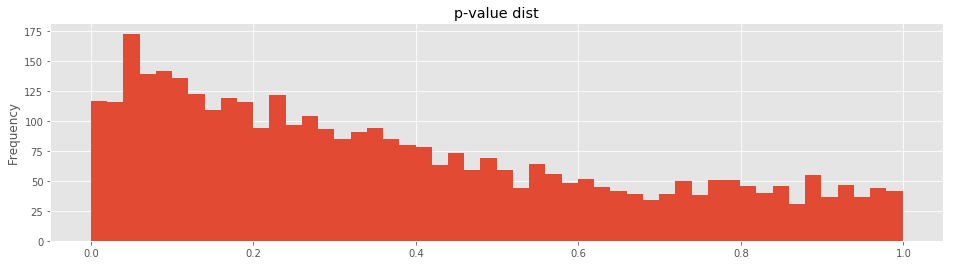

In [44]:
limma_data['limma_PValue'].plot(kind='hist',bins=50,figsize=(16,4))
plt.title('p-value dist')
plt.show()

In [45]:
data_irs = data_irs.join(limma_data[[n for n in limma_data if 'limma_' in n]])
data_irs['limma_log10FDR']=-np.log10(data_irs['limma_FDR'])
data_irs['limma_log10PValue']=-np.log10(data_irs['limma_PValue'])

In [46]:
#list(data_irs.columns)
data_irs['index']=data_irs.index.values
data_irs.set_index('prot_id',inplace=True)

In [47]:
data_irs.head()

,E1,C1,E2,C2,E3,C3,mean_E,mean_C,log10Sum,log2FC,...,edgeR_PValue,edgeR_FDR,edgeR_log10_PValue,limma_Acc,limma_PValue,limma_FDR,limma_candidate,limma_log10FDR,limma_log10PValue,index
prot_id,,,,,,,,,,,,,,,,,,,,,
Tb05.5K5.110,4.387344...,6.988253...,6.454399...,4.921199...,2.087271...,9.288326...,4.309671...,7.065926...,8.533095,-0.713301,...,0.812829,1.0,0.090001,155,0.173880,0.567426,no,0.246091,0.759750,155
Tb927.5.4470,3.949228...,1.181842...,2.311632...,9.901713...,1.139557...,8.177786...,4.700707...,7.512638...,5.563956,-0.676442,...,1.000000,1.0,-0.000000,156,0.553512,0.753821,no,0.122732,0.256873,156
Tb927.5.4500,3.048141...,4.419065...,9.220423...,2.170290...,2.939127...,2.798419...,1.421365...,1.670967...,7.967407,-0.233405,...,1.000000,1.0,-0.000000,157,0.779904,0.893589,no,0.048862,0.107959,157
Tb927.5.4520,3.575739...,1.045413...,8.390409...,5.639457...,5.847553...,8.182313...,5.937900...,8.091965...,7.624175,-0.446537,...,0.901682,1.0,0.044947,158,0.356883,0.642493,no,0.192131,0.447474,158
Tb927.5.4560,2.533047...,3.780274...,2.408277...,3.905044...,1.097772...,5.215549...,2.013032...,4.300289...,7.277379,-1.095064,...,0.562645,1.0,0.249765,159,0.057613,0.533021,no,0.273256,1.239478,159


In [48]:
df.join(data_irs.set_index('index')).to_csv('data_iris_limma.csv.gz')

In [ ]:
fig, ax=plt.subplots(figsize=(12,12), 
                     ncols=1, nrows=1)

ids = data_irs[data_irs['log2FC']>5]
print(ids['desc'].head())
_ids = ids.index.values
_names =[' '.join( n.split(' ')[0:2]) for n in ids['desc']]
print(len(_ids))
print(len(_names))

utilities.make_vulcano(data_irs, ax, x='log2FC', y='log10pvalue', 
             annot_index=_ids,
             annot_names = _names,
             title='Vulcano',
             fc_limit=5,
             fc_col='log2FC'
            )
#fig.savefig('vulcano.eps')

In [50]:
import itertools
pepDf = pd.read_csv(os.path.join(TXT_PATH,'peptides.txt'),sep='\t')
pep_ids = [n.split(';') for n in df['Peptide IDs']]
pep_ids = set(list(itertools.chain(*pep_ids)))
print(pepDf.shape)
pepDf=pepDf[pepDf.id.isin(pep_ids)]
print(pepDf.shape)
pepDf.head()                

(43716, 100)
(42762, 100)


,Sequence,N-term cleavage window,C-term cleavage window,Amino acid before,First amino acid,Second amino acid,Second last amino acid,Last amino acid,Amino acid after,A Count,...,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,MS/MS Count,LFQ intensity Bait_1,LFQ intensity Bait_2,LFQ intensity Bait_3,LFQ intensity Control_1,LFQ intensity Control_2,LFQ intensity Control_3
0,AAAAAFQE...,LVVTSLFD...,VRRAAAAA...,R,A,A,G,R,L,5,...,0,0.0,NaN,1,17655.0,0.0,0.0,0.0,0.0,0.0
1,AAAAALLS...,PLLTPLLW...,RIRAAAAA...,R,A,A,L,R,K,6,...,1;2,2.0,NaN,2,0.0,12718.0,0.0,0.0,12775.0,0.0
2,AAAAATAVVK,PEKELEPM...,TRKKRAAA...,R,A,A,V,K,G,6,...,3;4;5;6;7,3.0,NaN,4,0.0,424990.0,711690.0,0.0,96727.0,129020.0
3,AAAADCAADGR,GDPSPEQE...,MELKAAAA...,K,A,A,G,R,L,6,...,8;9,8.0,NaN,2,0.0,0.0,0.0,0.0,43881.0,20207.0
4,AAAADCAA...,GDPSPEQE...,GRLDEAVD...,K,A,A,L,R,L,9,...,10;11;12;13,11.0,NaN,4,7556.3,0.0,50414.0,0.0,0.0,156550.0


In [51]:
tag = 'Intensity'
bait_cols = [tag+' Bait_'+str(n) for n in range(1,4)]
control_cols = [tag+' Control_'+str(n) for n in range(1,4)]
cols = bait_cols+control_cols
pep_selection = pepDf[cols]

pep_selection.head()

,Intensity Bait_1,Intensity Bait_2,Intensity Bait_3,Intensity Control_1,Intensity Control_2,Intensity Control_3
0,33764.0,0,0,0,0,0
1,0.0,2720900,0,0,3135400,0
2,0.0,56695000,17733000,0,9837700,4175800
3,0.0,0,0,0,16366000,1316500
4,108050.0,0,5452200,0,0,10200000


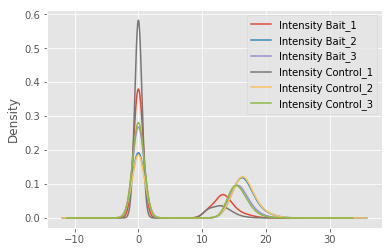

In [52]:
np.log1p(pep_selection).plot(kind='kde')
plt.show()

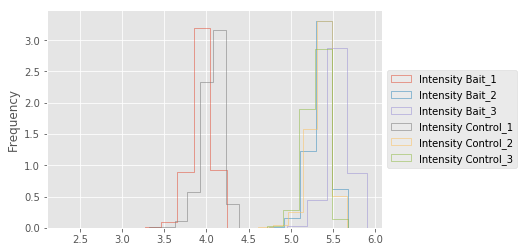

In [53]:
for n in pep_selection.columns:
    pep_selection[n]=utilities.replace_nan(pep_selection[n])  

fig, ax = plt.subplots()
for n in pep_selection.columns:
    pep_selection[n] = utilities.impute(pep_selection[n],ax=ax)

utilities.hist_legend(ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [54]:
pep_selection = utilities.norm_loading(pep_selection)
pep_selection.head()

,Intensity Bait_1,Intensity Bait_2,Intensity Bait_3,Intensity Control_1,Intensity Control_2,Intensity Control_3
0,6.810218...,1.004265...,6.421567...,204319.3...,9.940605...,5.156411...
1,1.580598...,1.270323...,6.108241...,266032.1...,1.387299...,5.382710...
2,1.301160...,2.401561...,2.564188...,121178.7...,4.147614...,1.055102...
3,1.602054...,9.881591...,5.938544...,165246.1...,6.949933...,3.659456...
4,1.867232...,1.186497...,8.210273...,216434.4...,1.195303...,2.494179...


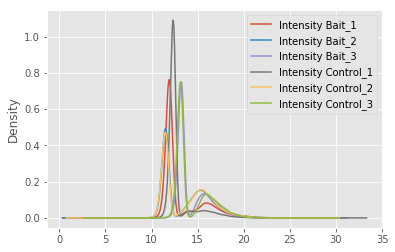

In [55]:
np.log1p(pep_selection).plot(kind='kde')
plt.show()
pep_selection.columns = ['E1','E2', 'E3', 'C1', 'C2', 'C3']

In [56]:
#mean of the sum intensity of all the proteins in each channel
irs = pd.concat([pep_selection[['E1','C1']].sum(axis=1), 
                 pep_selection[['E2','C2']].sum(axis=1),
                pep_selection[['E3','C3']].sum(axis=1)], axis=1)
irs.columns = ["sum1", "sum2", "sum3"]
#geometric mean of the sum intensity of all the proteins
irs['average']=np.exp(np.log(irs).mean(axis=1))
#normalization factors for each protein in each dataset
irs['fac1']=irs['average'] / irs['sum1']
irs['fac2']=irs['average'] / irs['sum2']
irs['fac3']=irs['average'] / irs['sum3']

data_irs_1 = pep_selection[['E1','C1']].multiply(irs.fac1, axis=0)
data_irs_2 = pep_selection[['E2','C2']].multiply(irs.fac2, axis=0)
data_irs_3 = pep_selection[['E3','C3']].multiply(irs.fac3, axis=0)
#combine again
data_irs = pd.concat([data_irs_1,data_irs_2,data_irs_3],axis=1)
data_irs.head()

,E1,C1,E2,C2,E3,C3
0,4.534404...,1.360407...,2.962456...,2.932355...,3.269476...,2.625335...
1,4.062541...,6.837707...,5.210235...,5.690012...,5.794241...,5.106007...
2,3.288342...,3.062477...,5.415530...,9.352887...,4.499416...,1.851402...
3,1.051879...,1.084976...,2.995643...,2.106899...,2.983514...,1.838504...
4,2.279213...,2.641879...,1.266998...,1.276402...,6.298858...,1.913515...


In [57]:
data_irs['mean_E']=data_irs[['E1','E2','E3']].mean(axis=1)
data_irs['mean_C']=data_irs[['C1','C2','C3']].mean(axis=1)
data_irs['log10Sum']=np.log10(data_irs[['E1','E2','E3','C1','C2','C3']].sum(axis=1))
data_irs['log2FC']=np.log2(data_irs['mean_E']/data_irs['mean_C'])
data_irs['Sequence'] = pepDf['Sequence']
data_irs['prot_id']=pepDf['Leading razor protein']
data_irs['prot_id']=[utilities.clean_id(n) for n in data_irs['prot_id']]
data_irs['desc']=[desc_dict.get(n,'none') for n in data_irs.prot_id]
data_irs['desc'] = [n.replace('gene_product=','') for n in data_irs['desc'] ]
data_irs['Log10signal_Q'] = pd.qcut(data_irs['log10Sum'], 50, range(50))
t, prob = ttest_ind(data_irs[['E1','E2','E3']].values,data_irs[['C1','C2','C3']].values,axis=1)
data_irs['t']=t
data_irs['prob']=prob
data_irs['log10pvalue']=-np.log10(data_irs['prob'])

In [58]:
data_irs.to_csv('pep_res.csv.gz')

                E1           C1           E2           C2           E3  \
4449   2.342088...  118978.7...  2.341179...  209901.4...  2.340264...   
13547  2.996857...  27337.52...  2.994140...  299079.7...  2.990652...   
14355  2.333200...  63910.46...  2.331612...  222670.6...  2.327611...   
15482  4.175588...  87353.38...  4.175191...  126993.3...  4.168480...   
18510  1.795504...  627935.0...  1.801171...  61265.84...  1.799079...   

                C3       mean_E       mean_C  log10Sum     log2FC  \
4449   301339.6...  2.341177...  210073.2...  8.846945  10.122125   
13547  647799.1...  2.993883...  324738.7...  8.953827   9.848522   
14355  622775.1...  2.330808...  303118.7...  8.845192   9.586731   
15482  798103.1...  4.173086...  337483.2...  9.097930  10.272083   
18510  270446.8...  1.798585...  319882.5...  8.732824   9.135104   

          Sequence      prot_id         desc Log10signal_Q            t  \
4449     AYGDTCGVR  Tb11.v5....  N-acetyl...           48   3141.

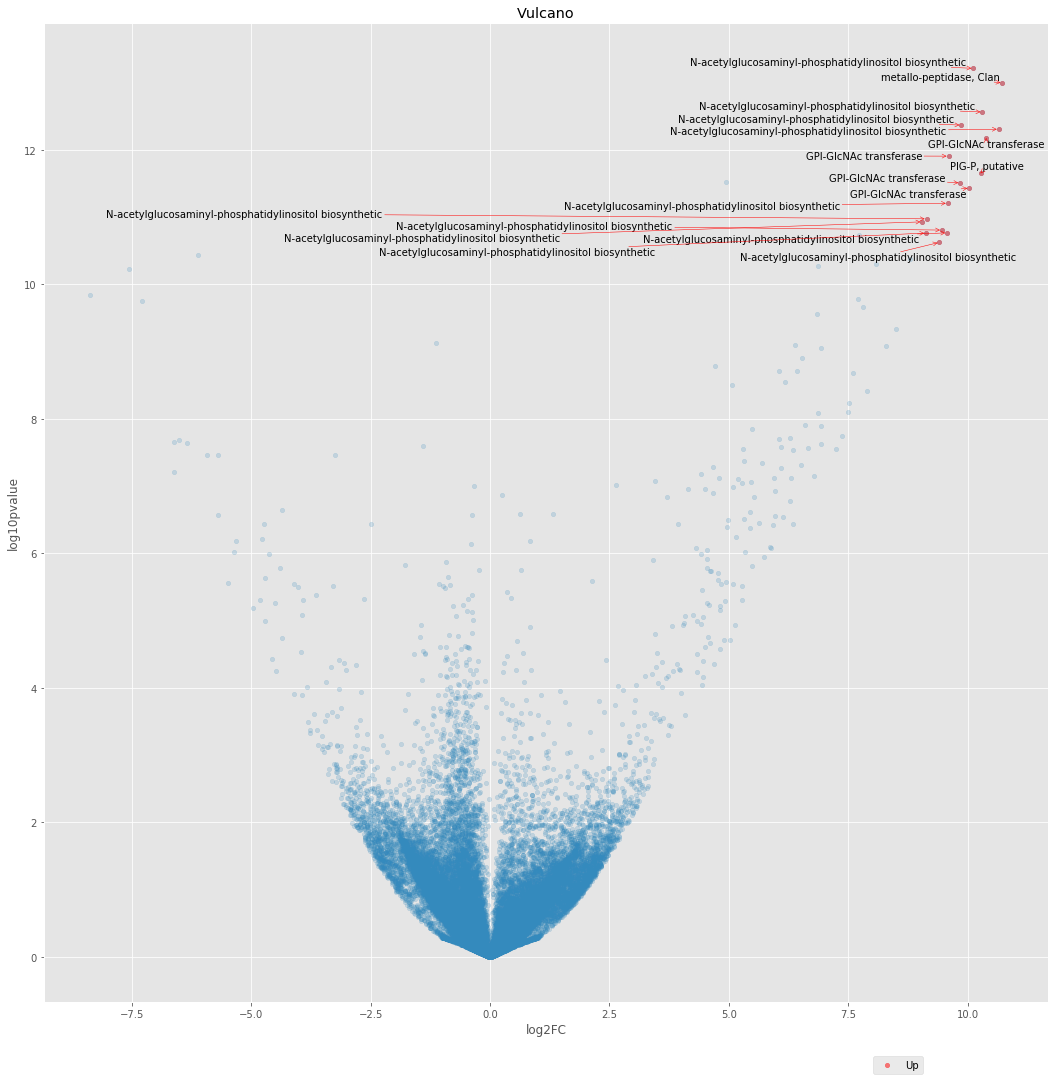

In [60]:
fig, ax=plt.subplots(figsize=(18,18), ncols=1, nrows=1)

ids = data_irs[data_irs['log2FC']>9]
print(ids.head())
_ids = ids.index.values
_names =[' '.join( n.split(' ')[0:2]) for n in ids['desc']]
print(len(_ids))
print(len(_names))

utilities.make_vulcano(data_irs, ax, x='log2FC', y='log10pvalue', 
             annot_index=_ids,
             annot_names = _names,
             title='Vulcano',
             fc_limit=9,
             fc_col='log2FC'
            )